In [1]:
import cantera as ct
from IPython.display import Image
from sbr import sbr
%matplotlib inline

# get current RMG model:
rmg_model_folder = "../../../meOH-synthesis/"
cti_file_path = rmg_model_folder + "base/cantera/chem_annotated.cti"

In [2]:
sbr_ss = sbr(
    cti_file_path,
    rmg_model_folder, 
    t_array=[528],
    p_array=[75],
    v_array=[0.00424],
    h2_array=[0.75],
    co2_array=[0.5],
    rtol=1.0e-11,
    atol=1.0e-22,
    reactor_type=0,
    energy="off",
    sensitivity=False,
    sensatol=1e-6,
    sensrtol=1e-6,
    reactime=1e5,
    grabow=False,
)

In [3]:
sbr_ss.run_reactor_ss()

Graph saved to: /Users/blais.ch/_01_code/05_Project_repos_Github/meOH_repos/meOH-analysis/cantera_simulations/RMG_model_analysis/2021_08_19_1424_e3a38d_added_gitignore/steady_state/Reactor/energy_off/sensitivity_off/528/flux_diagrams/0_7/0_5/reaction_path_C_gas_end-pretty.dot
Wrote graphviz input file to '/Users/blais.ch/_01_code/05_Project_repos_Github/meOH_repos/meOH-analysis/cantera_simulations/RMG_model_analysis/2021_08_19_1424_e3a38d_added_gitignore/steady_state/Reactor/energy_off/sensitivity_off/528/flux_diagrams/0_7/0_5/reaction_path_C_gas_end.dot'.
Wrote graphviz output file to '/Users/blais.ch/_01_code/05_Project_repos_Github/meOH_repos/meOH-analysis/cantera_simulations/RMG_model_analysis/2021_08_19_1424_e3a38d_added_gitignore/steady_state/Reactor/energy_off/sensitivity_off/528/flux_diagrams/0_7/0_5/reaction_path_C_gas_end.png'.
Graph saved to: /Users/blais.ch/_01_code/05_Project_repos_Github/meOH_repos/meOH-analysis/cantera_simulations/RMG_model_analysis/2021_08_19_1424_e3a38

Wrote graphviz output file to '/Users/blais.ch/_01_code/05_Project_repos_Github/meOH_repos/meOH-analysis/cantera_simulations/RMG_model_analysis/2021_08_19_1424_e3a38d_added_gitignore/steady_state/Reactor/energy_off/sensitivity_off/528/flux_diagrams/0_7/0_5/reaction_path_X_surface1_end.png'.


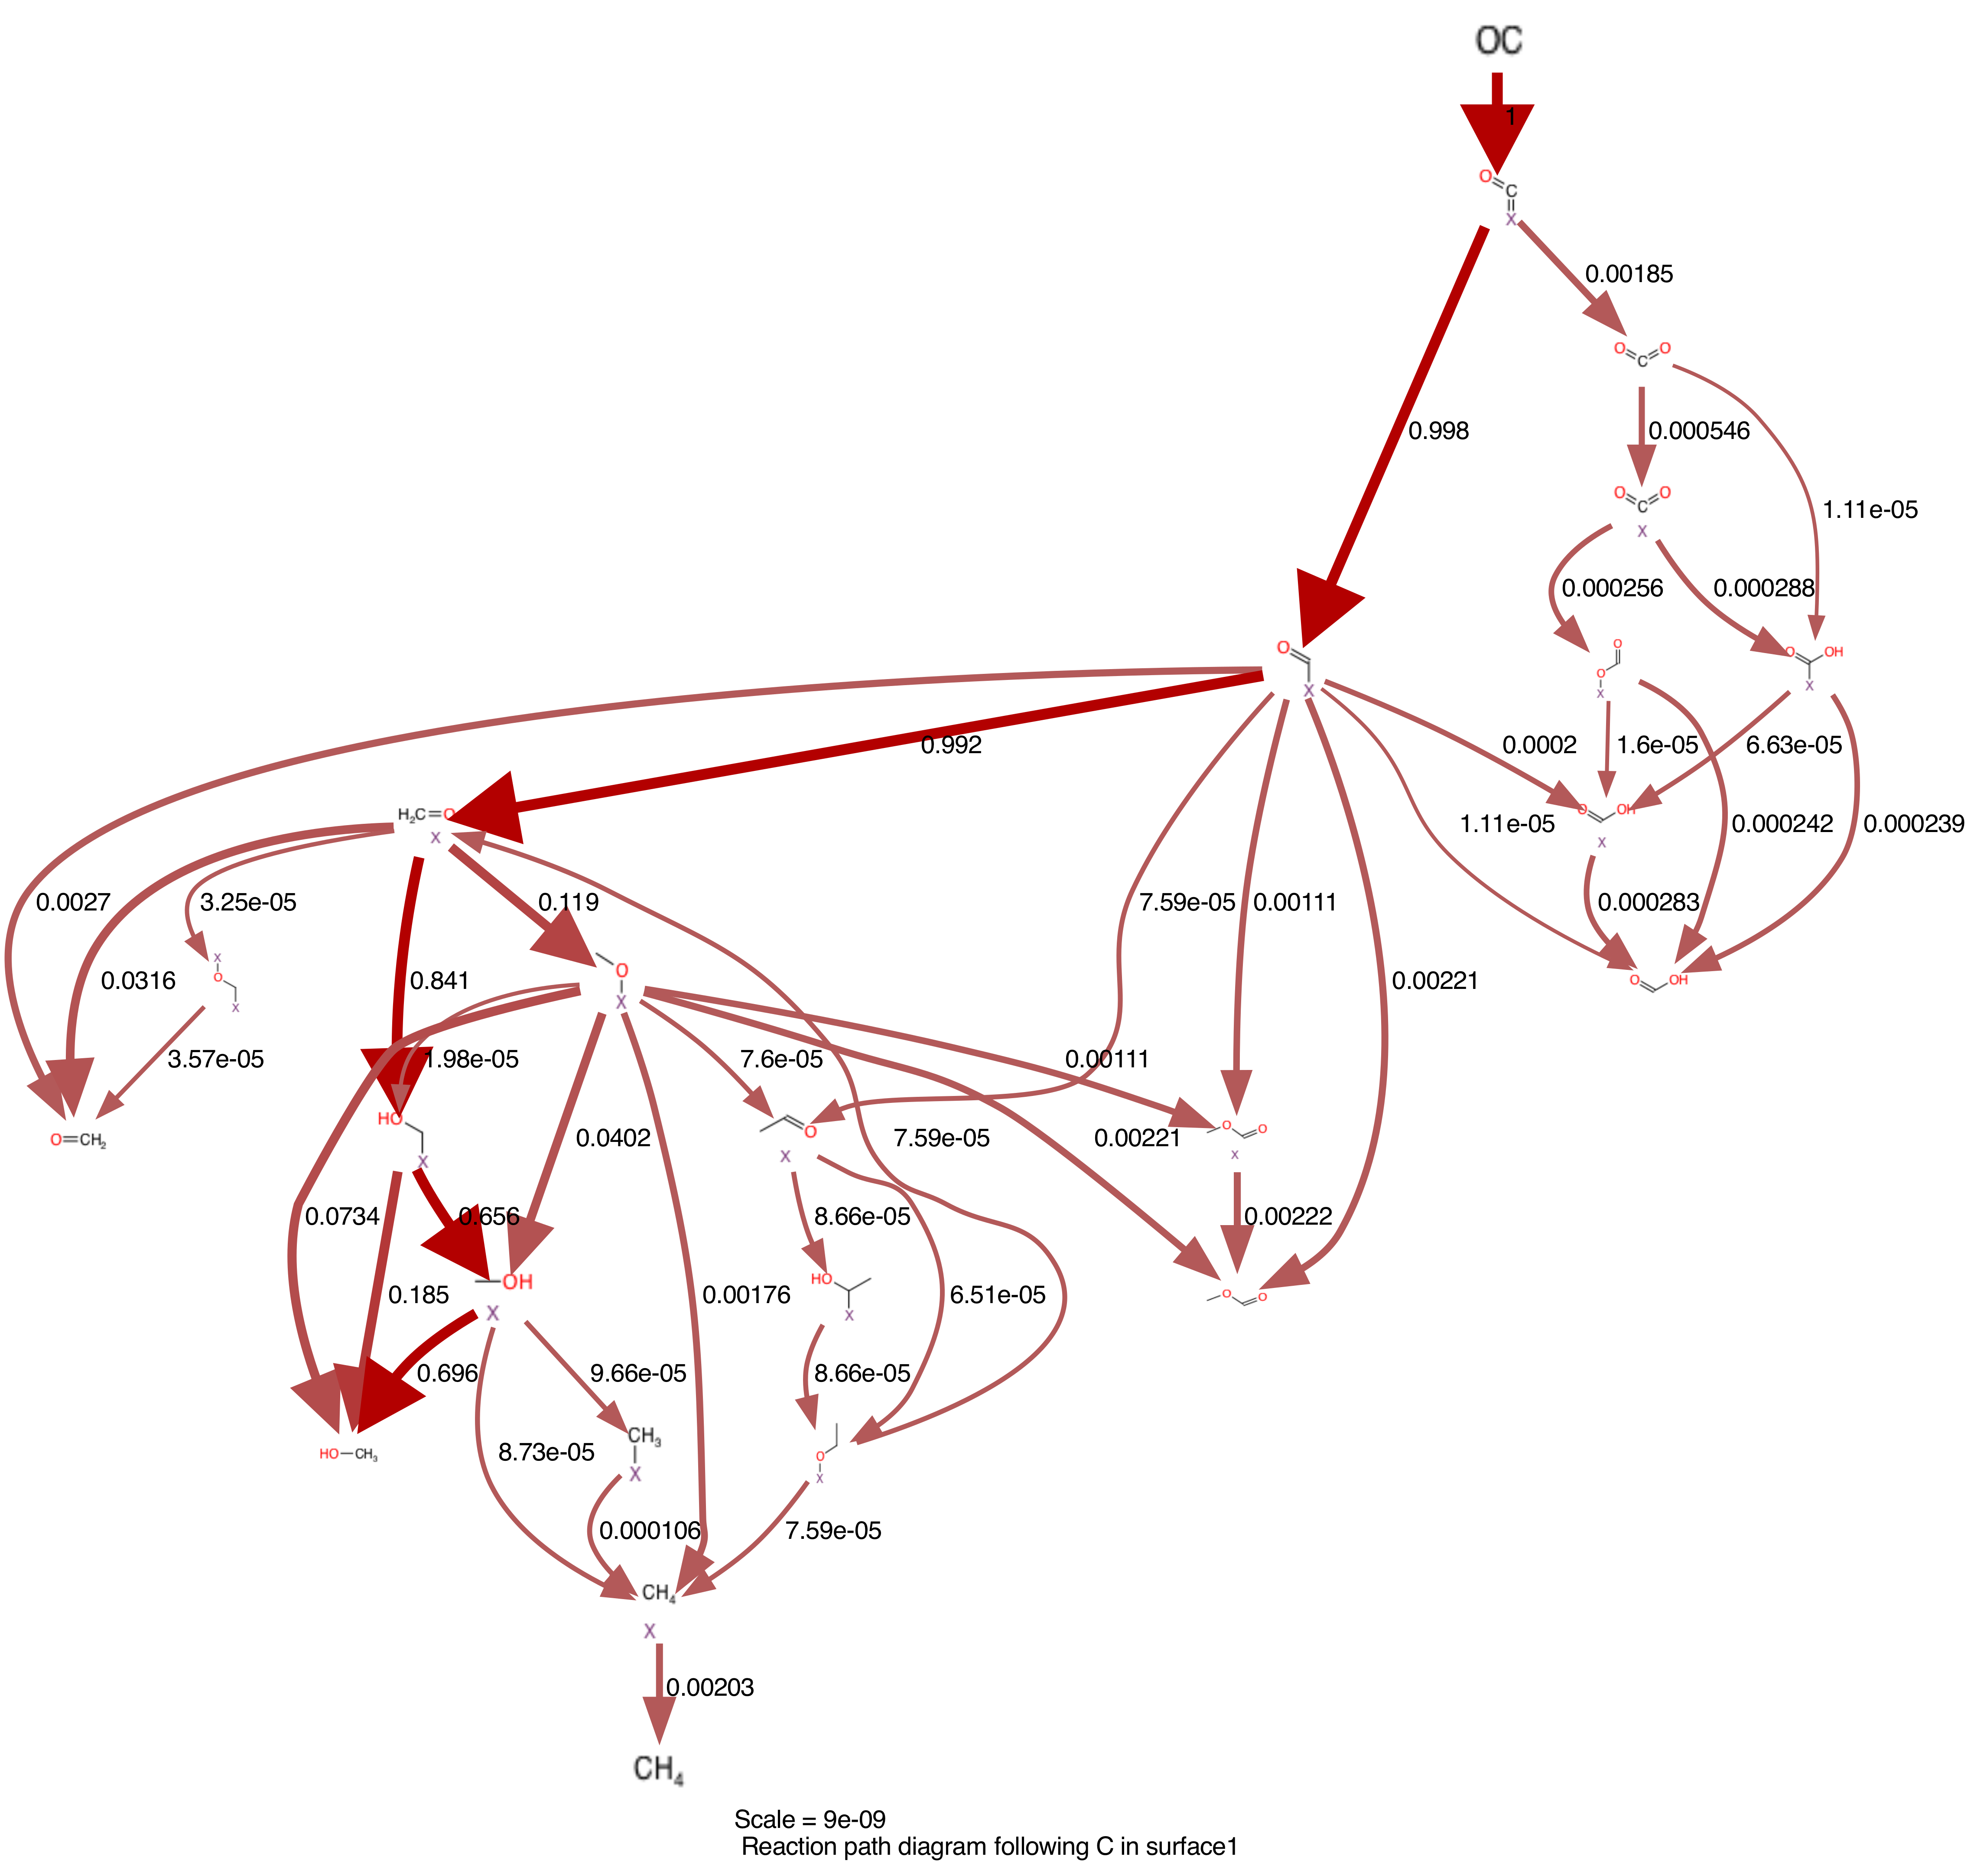

In [4]:
file = sbr_ss.flux_path + '/reaction_path_C_surface1_end-pretty.png'
Image(filename=file, width = 800) 

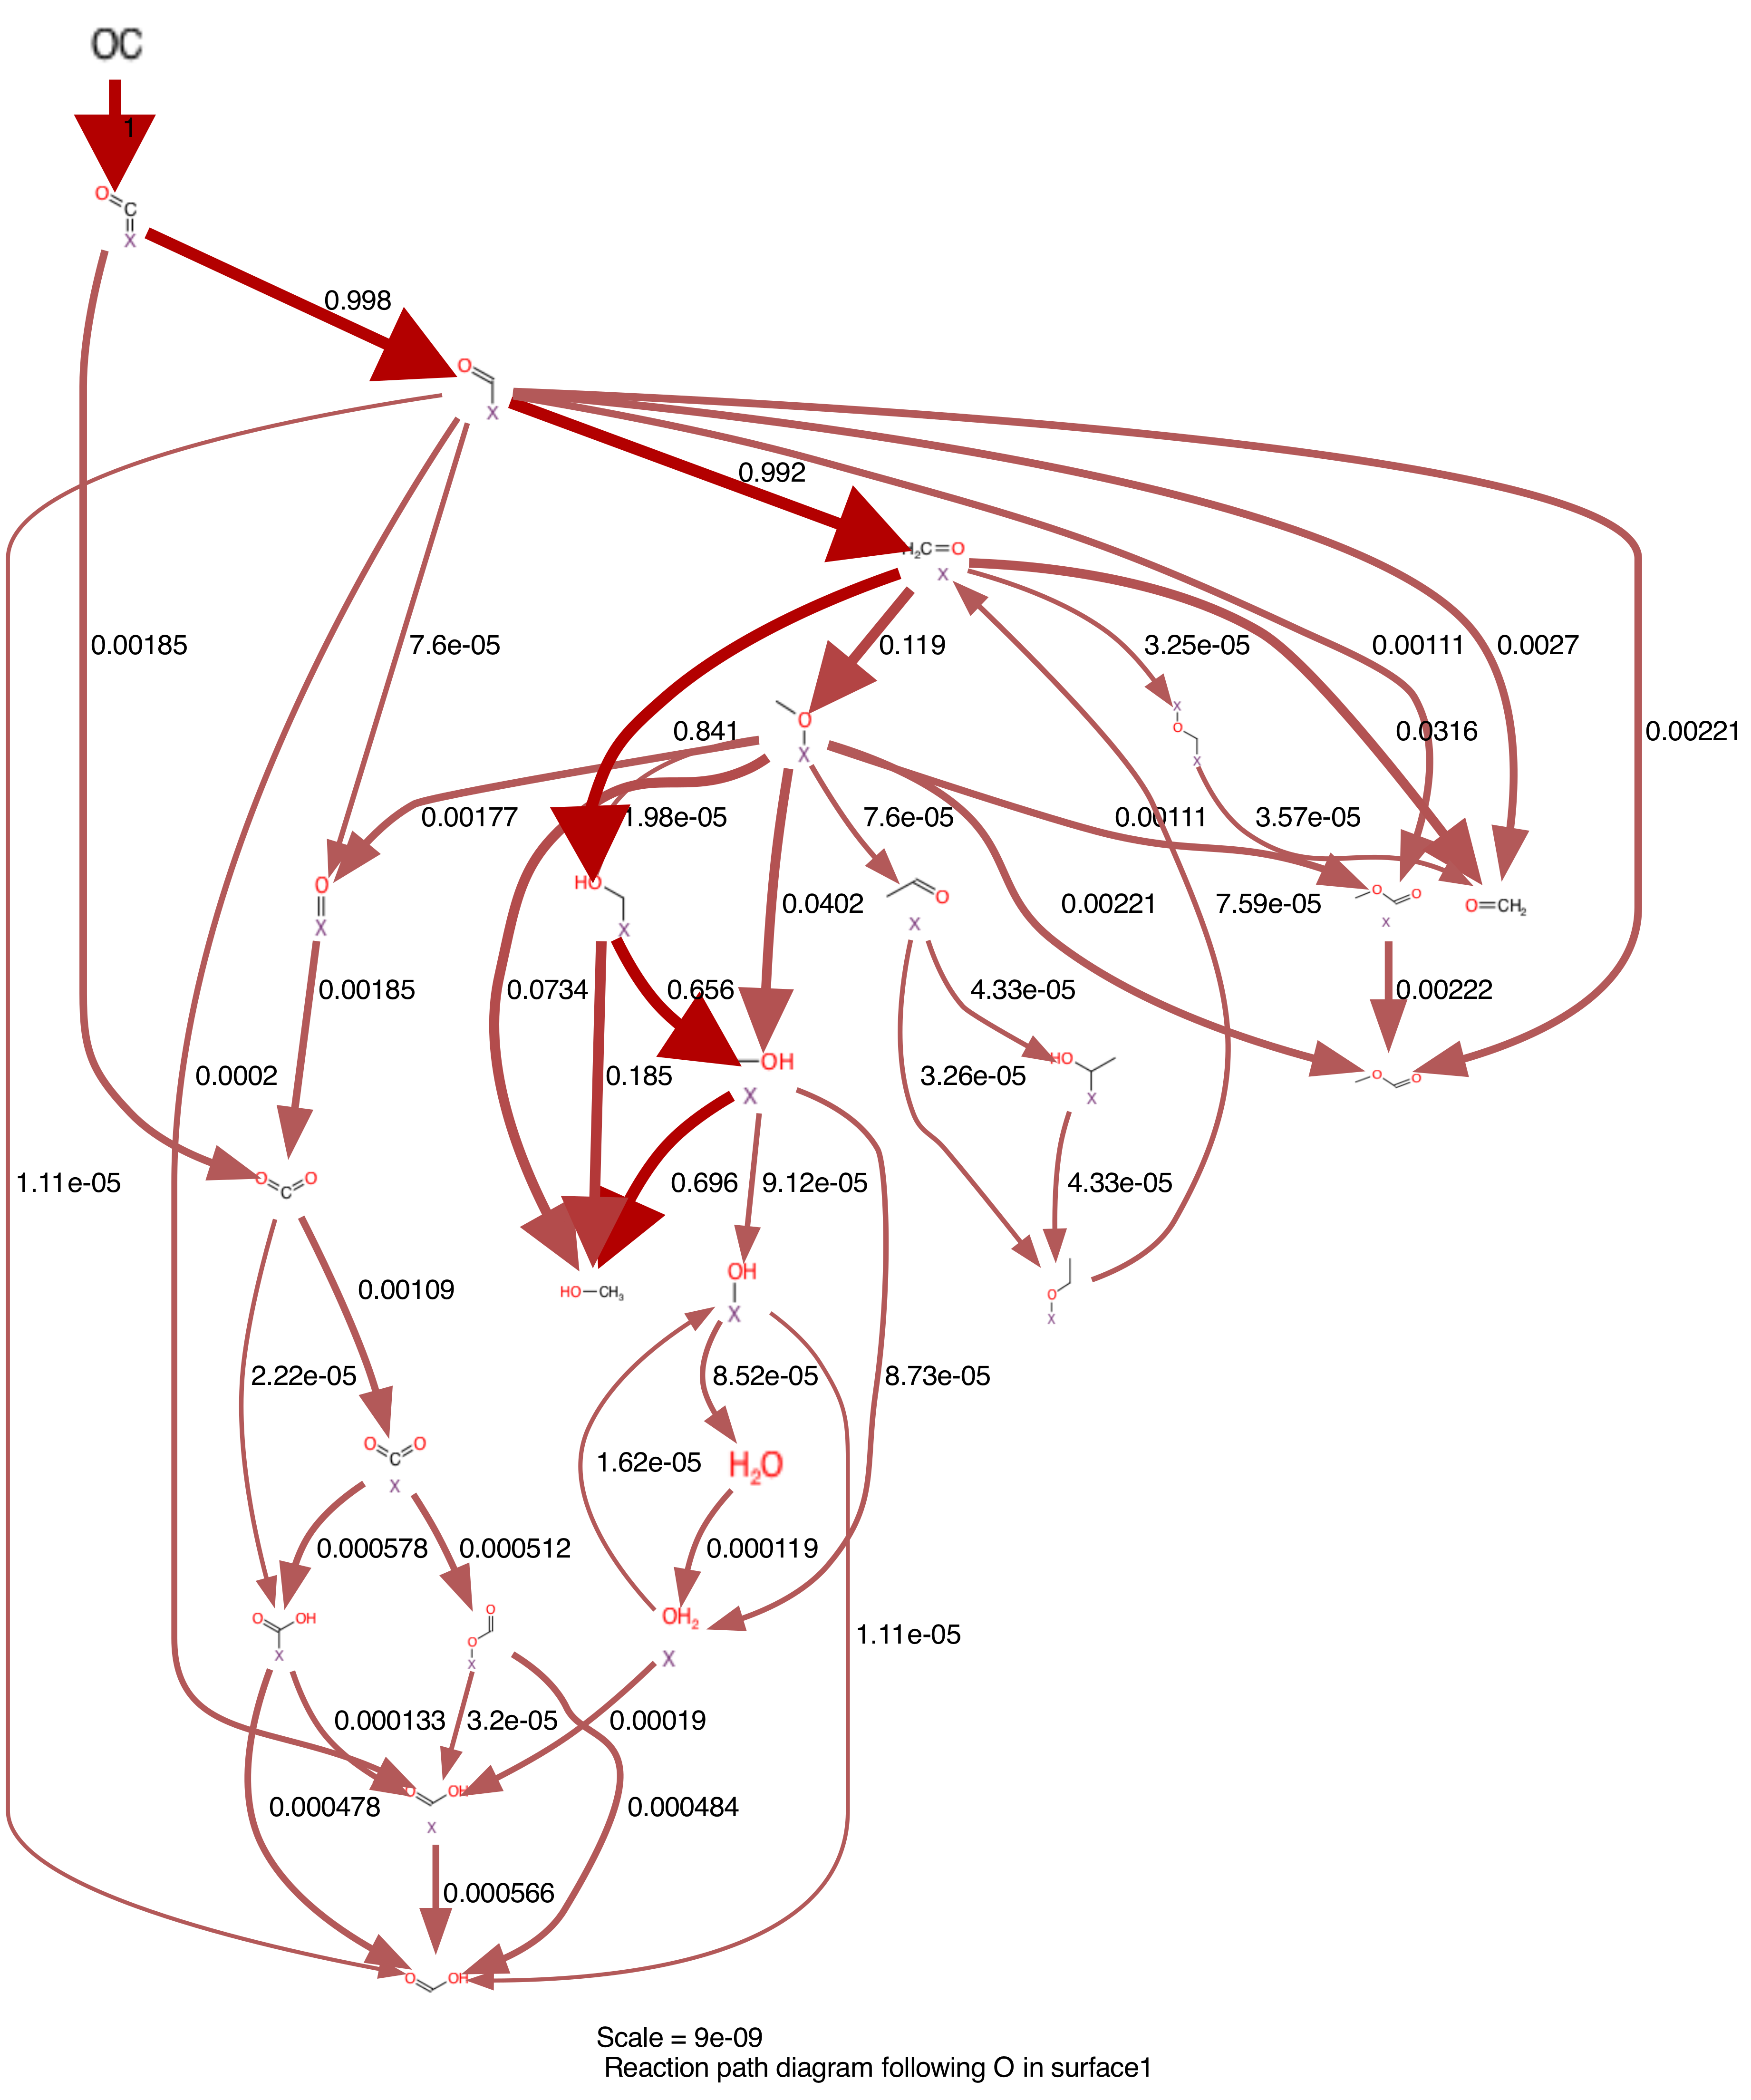

In [5]:
file = sbr_ss.flux_path + '/reaction_path_O_surface1_end-pretty.png'
Image(filename=file, width = 800) 

## potential energy surface 
enthalpy vs reaction coordinate

1 eV = ~96 kj/mol

In [6]:
sbr_ss.surf.species_names

['X(1)',
 'H*(10)',
 'O*(11)',
 'OH*(12)',
 'H2O*(13)',
 'CO*(14)',
 'CO2*(15)',
 'HCO*(16)',
 'HCOO*(17)',
 'COOH*(18)',
 'HCOOH*(19)',
 'CH2O*(20)',
 'CH3O*(21)',
 'CH3O2*(22)',
 'CH3OH*(23)',
 'CH3X(35)',
 'CH3OX(49)',
 'H2X(53)',
 'CH2OX2(55)',
 'SX(56)',
 'SX(58)',
 'SX(62)',
 'COXX(63)',
 'CHOX2(64)',
 'HOCOXX(65)',
 'CH4X(66)',
 'SX(206)',
 'SX(213)',
 'SX(225)',
 'SX(249)',
 'SX(351)',
 'SX(387)',
 'SX(421)',
 'SX(440)',
 'SX(870)',
 'SX(1035)']

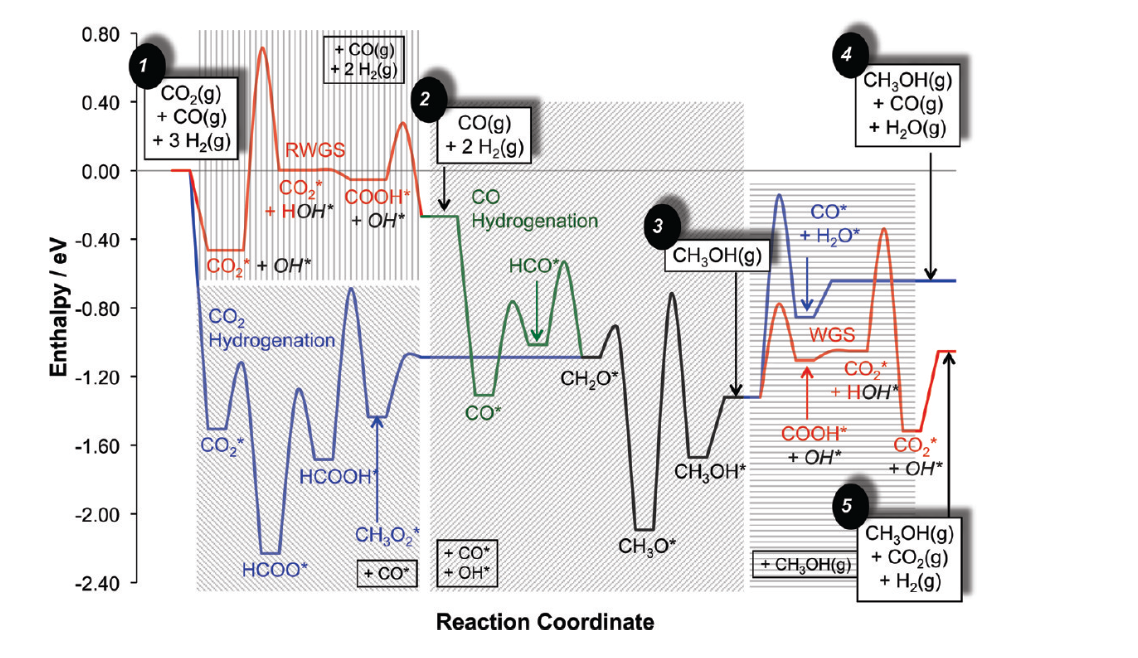

In [7]:
file = ('../images/Grabow_plots/Grabow_PES.png')
Image(filename=file, width = 900) 

we are missing CO2 mechanism, so let's compare thermo and barriers for CO2, CO2X, HCOOX, HCOOHX, CH3O2X, and CH2OX

## make function for finding all reactions containing a species

In [8]:
from energydiagram import ED
diagram = ED()

In [9]:
def get_h_ev(species, temp):
    """
    gets species enthalpy in eV. 
    species is a cantera Species object
    """
    h_eV = (species.thermo.h(temp)/1000**2)/96
    print(f'{species.name} enthalpy = {h_eV} eV')
    return h_eV

In [10]:
def get_ea_ev(reaction):
    """
    gets reaction Ea in eV. 
    reaction is a cantera Reaction object
    """
    Ea_eV = (reaction.rate.activation_energy/1000**2)/96
    print(f'{reaction.equation} enthalpy = {Ea_eV} eV')
    return Ea_eV

In [11]:
def find_reactions(species, temp):
    """
    find all reactions that involve a certain species.
    species is a species object
    rxns is a dictionary, reaction equation is the key, reaction object is the value
    """
    rxns = {}
    species_names = [i.name for i in species]
    species_ea = get_h_ev(species[1], temp)
    
    for i,j in enumerate(sbr_ss.gas.reaction_equations()):
        if all(x in j for x in species_names):
            rxns[j] = sbr_ss.gas.reaction(i)
            Ea = species_ea + (sbr_ss.gas.reaction(i).rate.activation_energy/1000**2)/96
            print(j, Ea)
            
    for i,j in enumerate(sbr_ss.surf.reaction_equations()):
        if all(x in j for x in species_names):
            rxns[j] = sbr_ss.surf.reaction(i)
            Ea = species_ea + (sbr_ss.surf.reaction(i).rate.activation_energy/1000**2)/96
            print(j, Ea)
            
    return rxns

reference energy as we calculate it for CO2, CO, 3H2 gas reactants is even more negative, instead of being above the intermediates. There is something missing here. 

In [12]:
reactant1 = sbr_ss.gas.species("CO(3)")
reactant2 = sbr_ss.gas.species("CO2(4)")
reactant3 = sbr_ss.gas.species("H2(2)")
H_eV_co = get_h_ev(reactant1, 499)
H_eV_co2 = get_h_ev(reactant2, 499)
H_eV_h2 = get_h_ev(reactant3, 499)

h_eV_ref = H_eV_co + H_eV_co2 + 3*H_eV_h2
h_eV_ref

CO(3) enthalpy = -1.0851170012944757 eV
CO2(4) enthalpy = -4.0078654896474495 eV
H2(2) enthalpy = 0.06085351526699115 eV


-4.910421945140952

In [13]:
reactant = sbr_ss.gas.species("CO2(4)")
product = sbr_ss.surf.species("CO2*(15)")

species_list = [reactant, product]
H_eV = get_h_ev(reactant, 499)
rxns = find_reactions(species_list, 499)
diagram.add_level(-3.99,"CO2(4)")
diagram.add_level(-3.94,"Ea1") #"CO2(4) + X(1) <=> CO2*(15)")

CO2(4) enthalpy = -4.0078654896474495 eV
CO2*(15) enthalpy = -3.9508466357401333 eV
CO2(4) + X(1) <=> CO2*(15) -3.9508466357401333


In [14]:
reactant = sbr_ss.surf.species("CO2*(15)")
product = sbr_ss.surf.species("HCOO*(17)")

species_list = [reactant, product]
H_eV = get_h_ev(reactant, 499)
rxns = find_reactions(species_list, 499)
diagram.add_level(-3.93,"CO2*(15)")
diagram.add_level(-3.08,"Ea2") #"CO2*(15) + H*(10) <=> HCOO*(17) + X(1)")

CO2*(15) enthalpy = -3.9508466357401333 eV
HCOO*(17) enthalpy = -3.9746599422200877 eV
CO2*(15) + H*(10) <=> HCOO*(17) + X(1) -2.7538471922200873
CO2*(15) + OH*(12) <=> HCOO*(17) + O*(11) -3.5904728588867543
CO2*(15) + H2O*(13) <=> HCOO*(17) + OH*(12) -3.1093564422200877
CO2*(15) + HCO*(16) <=> CO*(14) + HCOO*(17) -3.605857775553421
CO2*(15) + HCOOH*(19) <=> 2 HCOO*(17) -3.6128746922200876
CO2*(15) + HCOOH*(19) <=> COOH*(18) + HCOO*(17) -3.4535776088867545
CO2*(15) + HCOOH*(19) <=> COOH*(18) + HCOO*(17) -3.4535776088867545
CH2O*(20) + CO2*(15) <=> HCO*(16) + HCOO*(17) -3.9746599422200877
CH3OH*(23) + CO2*(15) <=> CH3O*(21) + HCOO*(17) -3.326706525553421
CO2*(15) + HCOOH*(19) <=> COOH*(18) + HCOO*(17) -3.4535776088867545
CO2*(15) + HCOOH*(19) <=> COOH*(18) + HCOO*(17) -3.4535776088867545
CO2*(15) + H2X(53) <=> H*(10) + HCOO*(17) -3.9746599422200877
CHOX2(64) + CO2*(15) <=> COXX(63) + HCOO*(17) -3.8097841922200875
CH3OH*(23) + CO2*(15) <=> CH3OX(49) + HCOO*(17) -3.9199628588867546
CH2OX2

In [15]:
reactant = sbr_ss.surf.species("HCOO*(17)")
product = sbr_ss.surf.species("HCOOH*(19)")

species_list = [reactant, product]
H_eV = get_h_ev(reactant, 499)
rxns = find_reactions(species_list, 499)
diagram.add_level(-3.95,"HCOO*(17)")
diagram.add_level( -3.43,"Ea3") # "H*(10) + HCOO*(17) <=> HCOOH*(19) + X(1)")

HCOO*(17) enthalpy = -3.9746599422200877 eV
HCOOH*(19) enthalpy = -4.364440545320291 eV
HCOOH*(19) + X(1) <=> H*(10) + HCOO*(17) -3.662400211986958
HCOOH*(19) + O*(11) <=> HCOO*(17) + OH*(12) -2.0894341286536244
HCOOH*(19) + O*(11) <=> HCOO*(17) + OH*(12) -2.0894341286536244
HCOOH*(19) + O*(11) <=> HCOO*(17) + OH*(12) -2.0894341286536244
HCOOH*(19) + O*(11) <=> HCOO*(17) + OH*(12) -2.0894341286536244
HCOOH*(19) + OH*(12) <=> H2O*(13) + HCOO*(17) -4.364440545320291
CO*(14) + HCOOH*(19) <=> HCO*(16) + HCOO*(17) -2.0894341286536244
CO2*(15) + HCOOH*(19) <=> 2 HCOO*(17) -4.002655295320292
CO2*(15) + HCOOH*(19) <=> COOH*(18) + HCOO*(17) -3.843358211986958
CO2*(15) + HCOOH*(19) <=> COOH*(18) + HCOO*(17) -3.843358211986958
CH2O*(20) + HCOO*(17) <=> HCO*(16) + HCOOH*(19) -4.364440545320291
CO2*(15) + HCOOH*(19) <=> COOH*(18) + HCOO*(17) -3.843358211986958
CO2*(15) + HCOOH*(19) <=> COOH*(18) + HCOO*(17) -3.843358211986958
COOH*(18) + HCOOH*(19) <=> HCOO*(17) + HCOOH*(19) -4.364440545320291
CH2O

In [16]:
reactant = sbr_ss.surf.species("HCOOH*(19)")
product = sbr_ss.surf.species("CH3O2*(22)")

species_list = [reactant, product]
H_eV = get_h_ev(reactant, 499)
rxns = find_reactions(species_list, 499)
diagram.add_level(-4.36,"HCOOH*(19)")
diagram.add_level(-2.79,"Ea4") #H*(10) + HCOOH*(19) <=> CH3O2*(22) + X(1)

HCOOH*(19) enthalpy = -4.364440545320291 eV
CH3O2*(22) enthalpy = -3.8322595881409103 eV
H*(10) + HCOOH*(19) <=> CH3O2*(22) + X(1) -2.6114468381409104
HCOOH*(19) + OH*(12) <=> CH3O2*(22) + O*(11) -3.2145965881409104
H2O*(13) + HCOOH*(19) <=> CH3O2*(22) + OH*(12) -2.4190264214742436
HCO*(16) + HCOOH*(19) <=> CH3O2*(22) + CO*(14) -3.229981504807577
CH2O*(20) + HCOOH*(19) <=> CH3O2*(22) + HCO*(16) -3.467031254807577
CH2O*(20) + HCOOH*(19) <=> CH3O2*(22) + HCO*(16) -3.467031254807577
2 HCOOH*(19) <=> CH3O2*(22) + HCOO*(17) -2.9225446714742436
2 HCOOH*(19) <=> CH3O2*(22) + COOH*(18) -2.76324758814091
CH2O*(20) + HCOOH*(19) <=> CH3O2*(22) + HCO*(16) -3.467031254807577
CH2O*(20) + HCOOH*(19) <=> CH3O2*(22) + HCO*(16) -3.467031254807577
CH3OH*(23) + HCOOH*(19) <=> CH3O*(21) + CH3O2*(22) -2.636332921474244
H2X(53) + HCOOH*(19) <=> CH3O2*(22) + H*(10) -3.324252254807577
CHOX2(64) + HCOOH*(19) <=> CH3O2*(22) + COXX(63) -3.4339079214742436
CH3OH*(23) + HCOOH*(19) <=> CH3O2*(22) + CH3OX(49) -3.2295

In [17]:
reactant = sbr_ss.surf.species("CH3O2*(22)")
product = sbr_ss.surf.species("CH2O*(20)")

species_list = [reactant, product]
H_eV = get_h_ev(reactant, 499)
rxns = find_reactions(species_list, 499)
diagram.add_level(-3.83,"CH3O2*(22)")
diagram.add_level(-1.59,"Ea5") #H*(10) + HCOOH*(19) <=> CH3O2*(22) + X(1)

CH3O2*(22) enthalpy = -3.8322595881409103 eV
CH2O*(20) enthalpy = -1.589566585198096 eV
CH2O*(20) + OH*(12) <=> CH3O2*(22) + X(1) -0.3687538351980959
CH2O*(20) + H2O*(13) <=> CH3O2*(22) + H*(10) -1.2616455851980959
CH2O*(20) + COOH*(18) <=> CH3O2*(22) + CO*(14) -1.2680959185314293
CH2O*(20) + HCOOH*(19) <=> CH3O2*(22) + HCO*(16) -1.2243382518647627
CH2O*(20) + HCOOH*(19) <=> CH3O2*(22) + HCO*(16) -1.2243382518647627
CH2O*(20) + HCOOH*(19) <=> CH3O2*(22) + HCO*(16) -1.2243382518647627
CH2O*(20) + HCOOH*(19) <=> CH3O2*(22) + HCO*(16) -1.2243382518647627
CH2O*(20) + SX(56) <=> CH3O2*(22) + CHOX2(64) 1.021772414801904
CH2O*(20) + CH3OH*(23) <=> CH3O2*(22) + CH3X(35) -1.311592085198096
CH2O*(20) + HOCOXX(65) <=> CH3O2*(22) + COXX(63) -1.3782310018647628


In [18]:
reactant = sbr_ss.surf.species("CH2O*(20)")
H_eV = get_h_ev(reactant, 499)
diagram.add_level(-1.59,"CH2O*(20)")

CH2O*(20) enthalpy = -1.589566585198096 eV


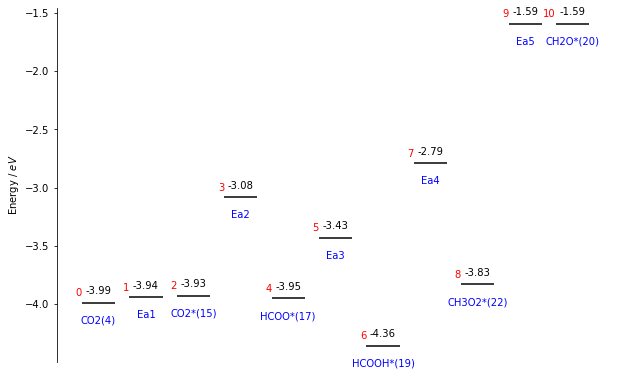

In [19]:
diagram.plot(show_IDs=True, ylabel="Energy / $eV$") # this is the default ylabel

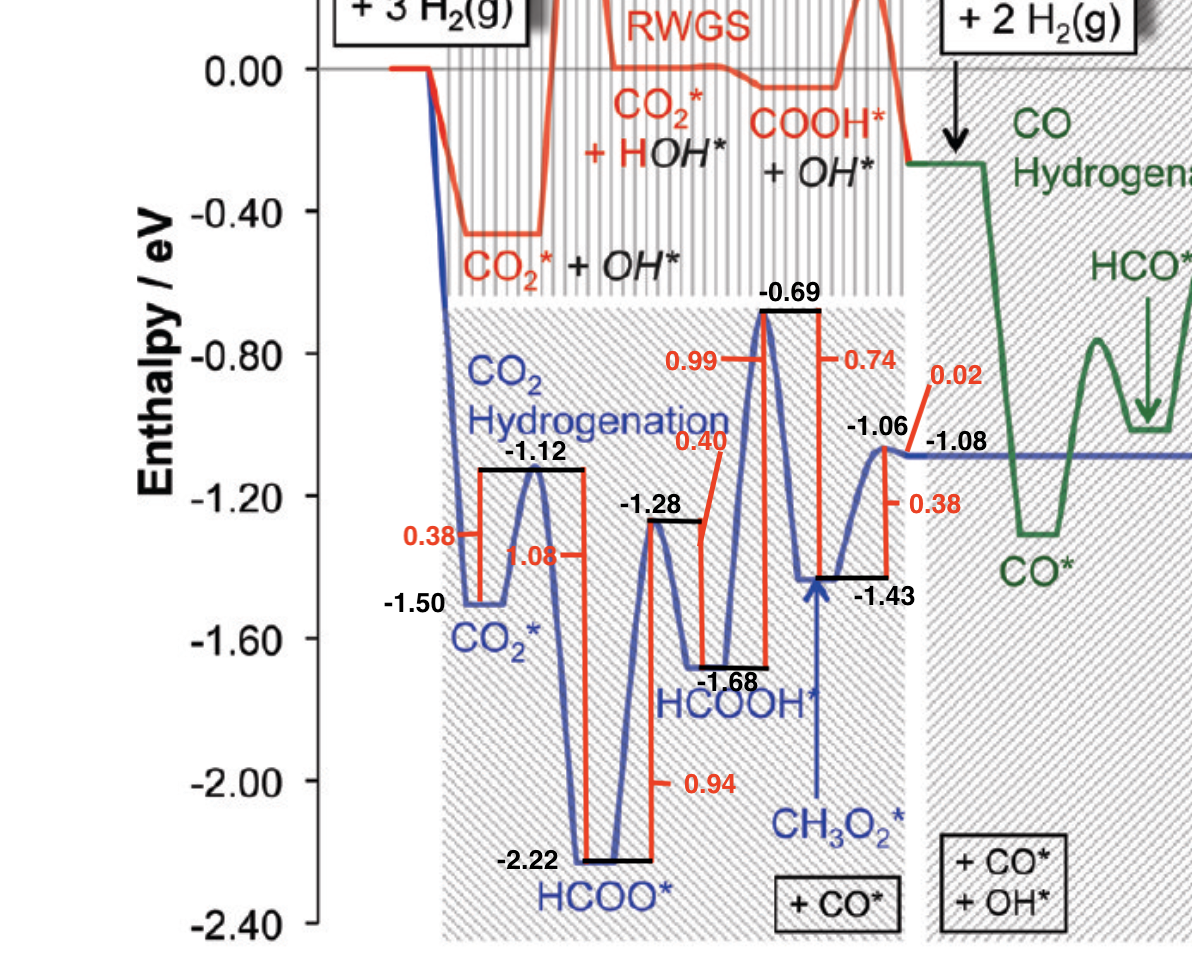

In [21]:
file = ('../images/Grabow_plots/Grabow_PES_CO2.png')
Image(filename=file, width = 600) 

### get equilibrium surface coverages

In [22]:
for i in zip(sbr_ss.surf.species_names, sbr_ss.surf.X):
    print(i)

('X(1)', 0.0022408507928903428)
('H*(10)', 0.00011797562138138566)
('O*(11)', 1.4181931479251807e-13)
('OH*(12)', 2.0569158875820054e-14)
('H2O*(13)', 1.533076454933776e-05)
('CO*(14)', 0.001227111243212467)
('CO2*(15)', 5.826160564132849e-08)
('HCO*(16)', 2.6604720393085115e-05)
('HCOO*(17)', 5.495753354615401e-13)
('COOH*(18)', 2.436228103496599e-12)
('HCOOH*(19)', 1.6411116668566892e-12)
('CH2O*(20)', 7.975991922331066e-08)
('CH3O*(21)', 1.6837841384833238e-12)
('CH3O2*(22)', 3.5463311958079745e-17)
('CH3OH*(23)', 3.002511892368991e-09)
('CH3X(35)', 1.8682530856491337e-19)
('CH3OX(49)', 7.232944099662159e-08)
('H2X(53)', 0.017636513100888294)
('CH2OX2(55)', 9.53614477757724e-18)
('SX(56)', 0.0042824721854169264)
('SX(58)', 0.018442821076482475)
('SX(62)', 1.598977165606387e-11)
('COXX(63)', 3.0493235648038432e-09)
('CHOX2(64)', 2.604349549943874e-16)
('HOCOXX(65)', 2.4666339022127163e-21)
('CH4X(66)', 4.316769459227278e-10)
('SX(206)', 2.5814682190646468e-12)
('SX(213)', 3.428263334

it appears that not much CO2 is adsorbed. this could be why we do not see much in that path

## Pictures of Key species

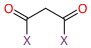

In [28]:
file = sbr_ss.species_path + "/SX(421).png"
Image(filename=file, width = 100) 

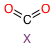

In [29]:
file = sbr_ss.species_path + "/CO2*(15).png"
Image(filename=file, width = 100) 

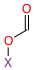

In [30]:
file = sbr_ss.species_path + "/HCOO*(17).png"
Image(filename=file, width = 80) 

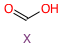

In [31]:
file = sbr_ss.species_path + "/HCOOH*(19).png"
Image(filename=file, width = 80) 

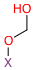

In [32]:
file = sbr_ss.species_path + "/CH3O2*(22).png"
Image(filename=file, width = 70) 

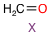

In [33]:
file = sbr_ss.species_path + "/CH2O*(20).png"
Image(filename=file, width = 70) 

# plotting potential energy surface

In [1]:
import cantera as ct
from IPython.display import Image
from sbr import sbr
%matplotlib inline

import os
import sys
sys.path.append(f'{os.getcwd()}/tools')
import pes_plot


# get current RMG model:
# get current RMG model:
rmg_model_folder = "../../../meOH-synthesis/"
cti_file_path = rmg_model_folder + "base/cantera/chem_annotated.cti"

/Users/blais.ch/_01_code/05_Project_repos_Github/meOH_repos/meOH-analysis/cantera_simulations/RMG_model_analysis


In [2]:
pes_plot_1 = pes_plot.pes_plot(cti_file_path)

In [3]:
pes_plot_1.surf.species_names

['X(1)',
 'H*(10)',
 'O*(11)',
 'OH*(12)',
 'H2O*(13)',
 'CO*(14)',
 'CO2*(15)',
 'HCO*(16)',
 'HCOO*(17)',
 'COOH*(18)',
 'HCOOH*(19)',
 'CH2O*(20)',
 'CH3O*(21)',
 'CH3O2*(22)',
 'CH3OH*(23)',
 'CH3X(35)',
 'CH3OX(49)',
 'H2X(53)',
 'CH2OX2(55)',
 'SX(56)',
 'SX(58)',
 'SX(62)',
 'COXX(63)',
 'CHOX2(64)',
 'HOCOXX(65)',
 'CH4X(66)',
 'SX(206)',
 'SX(213)',
 'SX(225)',
 'SX(249)',
 'SX(351)',
 'SX(387)',
 'SX(421)',
 'SX(440)',
 'SX(870)',
 'SX(1035)']

COOH*(18) enthalpy = -3.8158874910381932 eV
CO2*(15) + H*(10) <=> COOH*(18) + X(1) -2.595074741038193
CO2*(15) + OH*(12) <=> COOH*(18) + O*(11) -3.3682430743715264
CO2*(15) + H2O*(13) <=> COOH*(18) + OH*(12) -2.79128690770486
CO2*(15) + HCO*(16) <=> CO*(14) + COOH*(18) -3.38358440770486
CO2*(15) + HCOOH*(19) <=> COOH*(18) + HCOO*(17) -3.29480515770486
CO2*(15) + HCOOH*(19) <=> COOH*(18) + HCOO*(17) -3.29480515770486
CO2*(15) + HCOOH*(19) <=> 2 COOH*(18) -3.1355080743715265
CH2O*(20) + CO2*(15) <=> COOH*(18) + HCO*(16) -3.8158874910381932
CH3OH*(23) + CO2*(15) <=> CH3O*(21) + COOH*(18) -3.0086369910381934
CO2*(15) + HCOOH*(19) <=> COOH*(18) + HCOO*(17) -3.29480515770486
CO2*(15) + HCOOH*(19) <=> COOH*(18) + HCOO*(17) -3.29480515770486
CO2*(15) + H2X(53) <=> COOH*(18) + H*(10) -3.6965127410381933
CHOX2(64) + CO2*(15) <=> COOH*(18) + COXX(63) -3.58755440770486
CH3OH*(23) + CO2*(15) <=> CH3OX(49) + COOH*(18) -3.6018933243715265
CH2OX2(55) + CO2*(15) <=> CHOX2(64) + COOH*(18) -3.24699424103

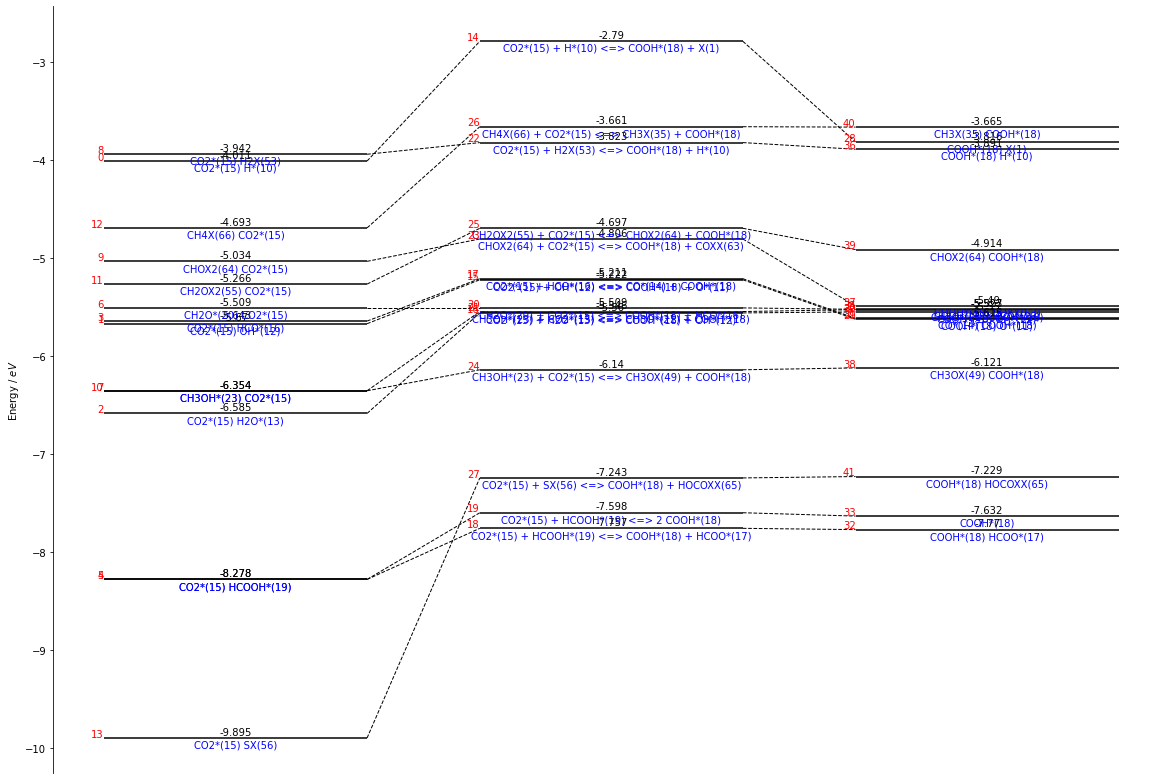

In [4]:
pes_plot_1.plot_pes_diagram(
    ["CO2*(15)","COOH*(18)"],
    width=20, 
    height=40, 
    offset = 0.01,
#     dimension = 10,
#     space = 10, 
    combined=True
)

## Compare to Bjarne's mechanism

In [5]:
bjarne_file_path = '../../External_data/Bjarne_CO2_mechanism/CO2_hydrogenation_Bjarne.cti'
pes_plot_2 = pes_plot.pes_plot(bjarne_file_path)

In [6]:
# pes_plot_1.surf.species_names

HCOOX(21) enthalpy = -4.315047077118483 eV
HCOOX(21) + site(7) <=> CO2X(9) + HX(8) -3.3265334937851496
HCOOX(21) + OX(10) <=> CO2X(9) + HOX(12) -2.023827660451816
HCOOX(21) + OCX(11) <=> CO2X(9) + CXHO(20) -3.15250524378515
HCOOX(21) + HOX(12) <=> CO2X(9) + H2OX(13) -3.515380077118483
CH2X(16) + HCOOX(21) <=> CH3X(17) + CO2X(9) -3.497598077118483
HCOOX(21) + HCXOH(23) <=> CO2X(9) + H2CXOH(24) -3.5900819104518162
C2H5X(26) + HCOOX(21) <=> C2H6X(25) + CO2X(9) -3.4183199937851496
CHCH3X(27) + HCOOX(21) <=> C2H5X(26) + CO2X(9) -3.4690509937851495
CXCH2(29) + HCOOX(21) <=> CO2X(9) + CXHCH2(30) -3.215178077118483
27
27
27
27
27
27
27
27
27


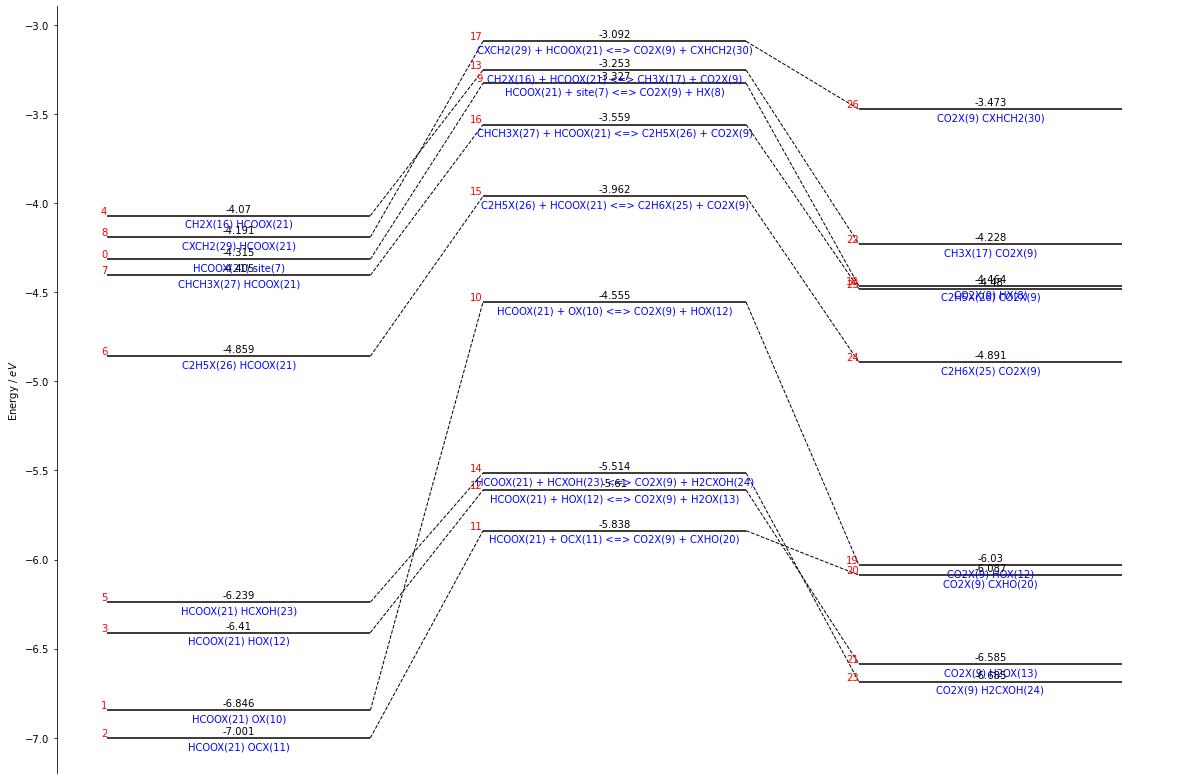

In [8]:
pes_plot_2.plot_pes_diagram(
    ["CO2X(9)","HCOOX(21)"],
    width=20, 
    height=40, 
    offset = 0.01,
#     dimension = 10,
#     space = 10, 
    combined=True
)